## Import Packages, Load Data, and Explore Dataset Structure

In this step, we import all necessary Python packages, load the credit scoring dataset, and explore its structure.  
We check:
- Number of rows and columns  
- Variable data types  
- Basic information to understand the dataset  


In [21]:
# Import required packages
import pandas as pd
import numpy as np
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the file path based on your environment)
df = pd.read_csv("../data/raw/data.csv")

# Display first few rows
print("🔹 First 5 Rows of the Dataset:")
display(df.head())

# Shape of the dataset
print("\n🔹 Dataset Shape (rows, columns):")
print(df.shape)

# Data types and column summary
print("\n🔹 Dataset Info:")
df.info()

# Summary statistics for numerical columns
print("\n🔹 Summary Statistics:")
display(df.describe())


🔹 First 5 Rows of the Dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



🔹 Dataset Shape (rows, columns):
(95662, 16)

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  Pricing

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## Understanding Central Tendency, Dispersion, and Distribution Shape

In this step, we analyze the statistical properties of the dataset to understand:
- **Central tendency**  
  - Mean, Median, Mode  
- **Dispersion**  
  - Variance, Standard Deviation, Range, Interquartile Range (IQR)  
- **Distribution Shape**  
  - Skewness (asymmetry)  
  - Kurtosis (tailedness)

These metrics help us identify potential outliers, data imbalance, and variable characteristics before modeling.


In [22]:
# --- Central Tendency, Dispersion, and Distribution Shape ---


# Standard deviation, variance, range, IQR
print("\n🔹 Dispersion Metrics:")
print("\nStandard Deviation:")
print(df.std(numeric_only=True))

print("\nVariance:")
print(df.var(numeric_only=True))

print("\nRange (Max - Min):")
range_vals = df.max(numeric_only=True) - df.min(numeric_only=True)
print(range_vals)

print("\nInterquartile Range (IQR):")
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

# Skewness and kurtosis
print("\n🔹 Shape of Distribution:")
print("\nSkewness:")
print(df.skew(numeric_only=True))

print("\nKurtosis:")
print(df.kurt(numeric_only=True))



🔹 Dispersion Metrics:

Standard Deviation:
CountryCode             0.000000
Amount             123306.797164
Value              123122.087776
PricingStrategy         0.732924
FraudResult             0.044872
dtype: float64

Variance:
CountryCode        0.000000e+00
Amount             1.520457e+10
Value              1.515905e+10
PricingStrategy    5.371778e-01
FraudResult        2.013471e-03
dtype: float64

Range (Max - Min):
CountryCode               0.0
Amount             10880000.0
Value               9879998.0
PricingStrategy           4.0
FraudResult               1.0
dtype: float64

Interquartile Range (IQR):
CountryCode           0.0
Amount             2850.0
Value              4725.0
PricingStrategy       0.0
FraudResult           0.0
dtype: float64

🔹 Shape of Distribution:

Skewness:
CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

Kurtosis:
CountryCode           0.

## Visualizing Distribution of Numerical Features

In this step, we create visualizations to:
- Understand the **distribution** of numerical features  
- Identify **skewness** and asymmetry  
- Detect **potential outliers** using boxplots  

These insights will guide data preprocessing, feature engineering, and model selection.


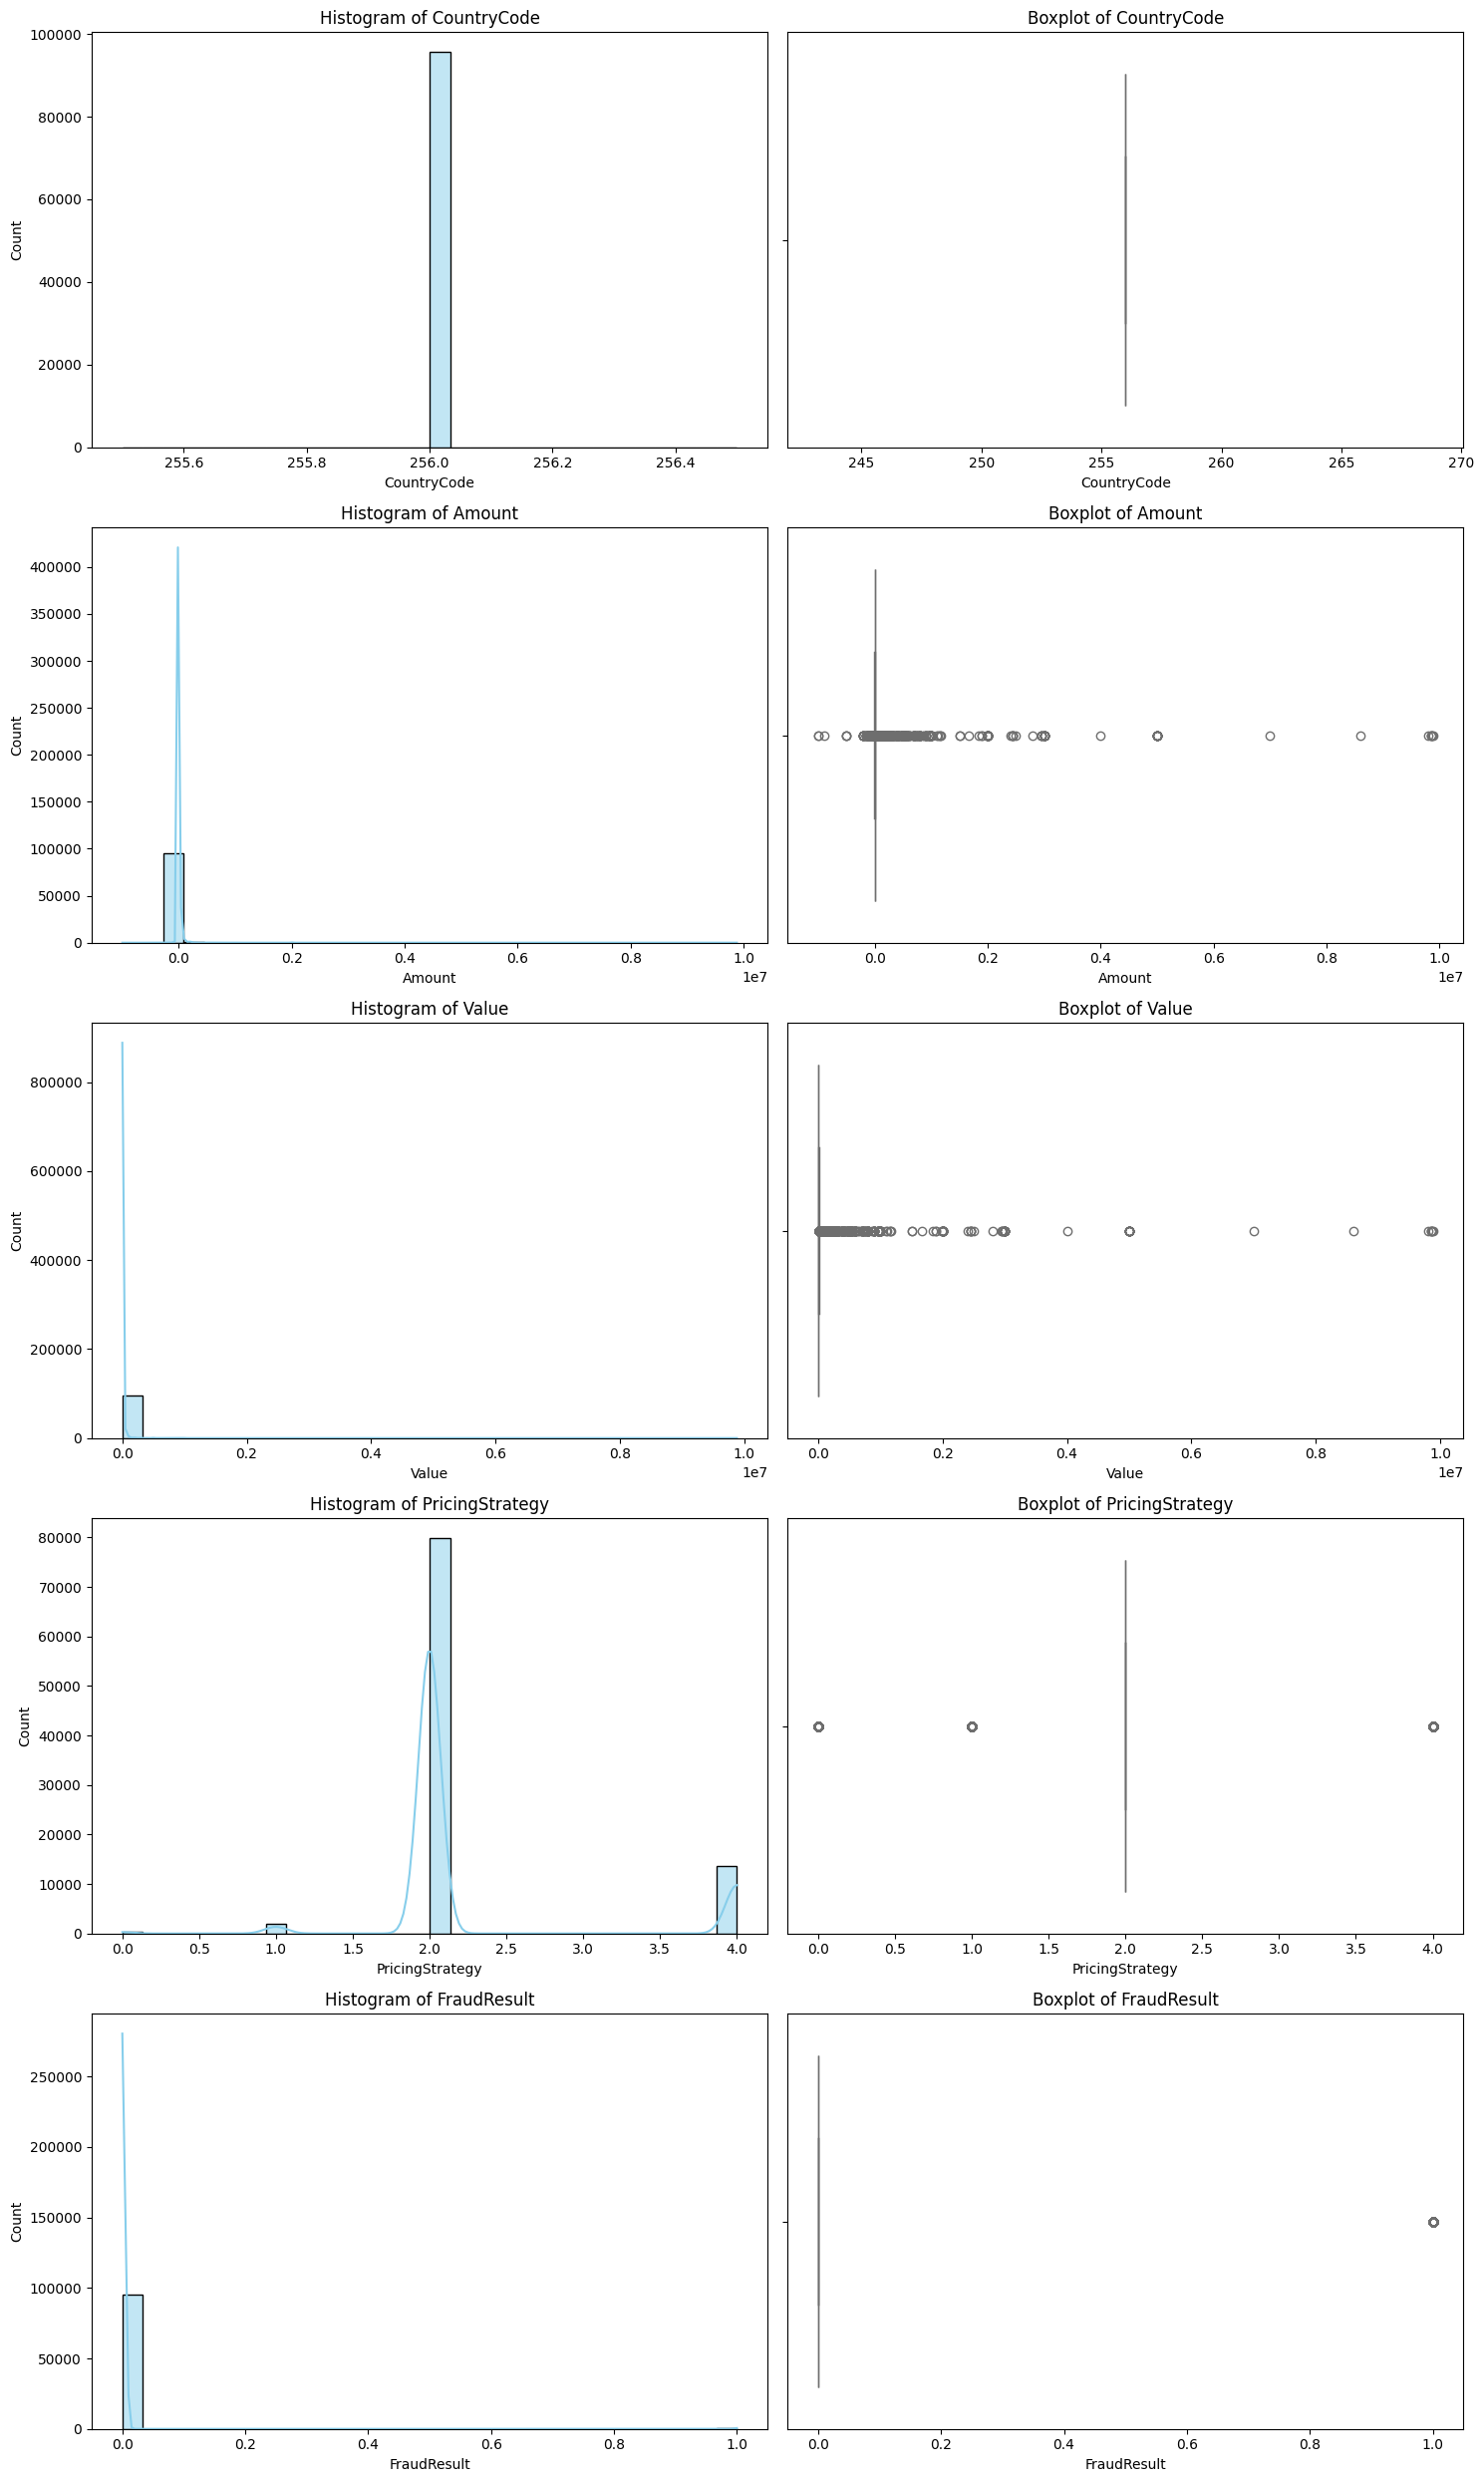

In [23]:


# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set figure size for plots
plt.figure(figsize=(15, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, 2*i-1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(numerical_cols), 2, 2*i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


## Distribution of Selected Categorical Features

We will analyze the distribution of the following categorical columns:  

- `CurrencyCode` → Country currency (e.g., USD, EUR)  
- `CountryCode` → Numerical code representing the country  
- `ProviderId` → Source provider of the item  
- `ProductId` → Specific item name  
- `ProductCategory` → Broader category grouping products  
- `ChannelId` → Platform used (web, Android, iOS, etc.)  
- `PricingStrategy` → Category of pricing structure  

Understanding the frequency and variability of these categories helps in feature engineering, encoding, and detecting dominant or rare categories.


C:\Users\azeb.mehrete\AppData\Local\Temp\ipykernel_19852\60927786.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
C:\Users\azeb.mehrete\AppData\Local\Temp\ipykernel_19852\60927786.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
C:\Users\azeb.mehrete\AppData\Local\Temp\ipykernel_19852\60927786.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().ind

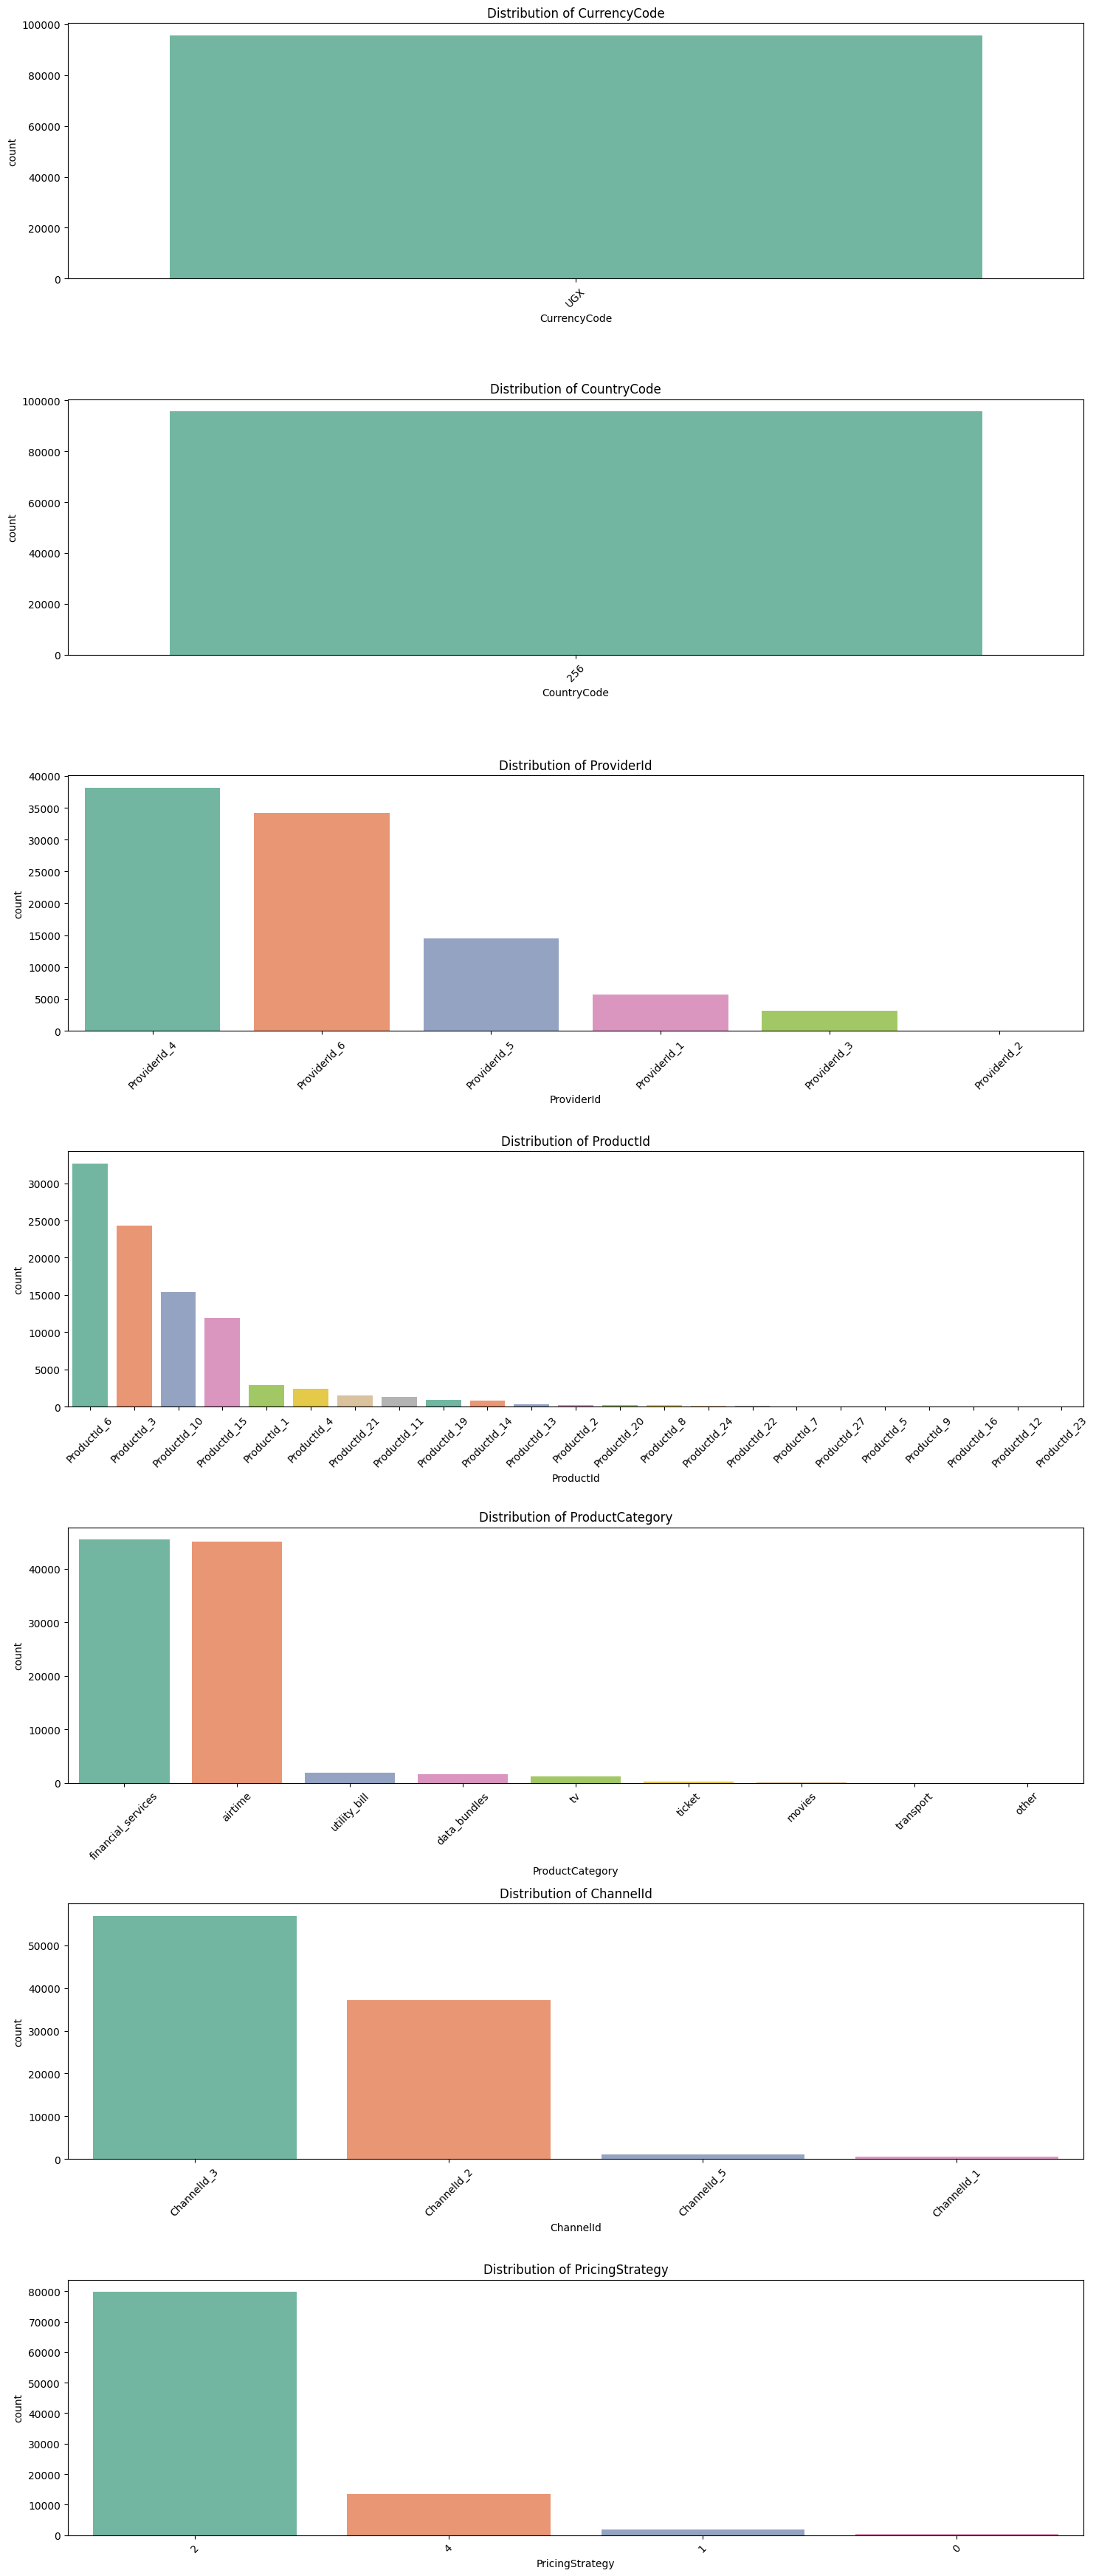


🔹 Value counts for 'CurrencyCode':
CurrencyCode
UGX    95662
Name: count, dtype: int64

🔹 Value counts for 'CountryCode':
CountryCode
256    95662
Name: count, dtype: int64

🔹 Value counts for 'ProviderId':
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64

🔹 Value counts for 'ProductId':
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
Name: count, dtype: int64

🔹 Value counts for 'ProductCategory':
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64



In [24]:
# Selected categorical columns
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 
                    'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy']

# Set figure size
plt.figure(figsize=(15, 5 * len(categorical_cols)))

# Plot countplots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"\n🔹 Value counts for '{col}':")
    print(df[col].value_counts().head(10))  # show top 10 for brevity


## Correlation Analysis of Numerical Features

Correlation analysis helps us understand the relationship between numerical features.  
- Identify **positively or negatively correlated** variables  
- Detect **redundant or highly correlated features**  
- Inform feature selection and multicollinearity handling in modeling  

We will visualize the correlations using a **heatmap**.


🔹 Correlation Matrix:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


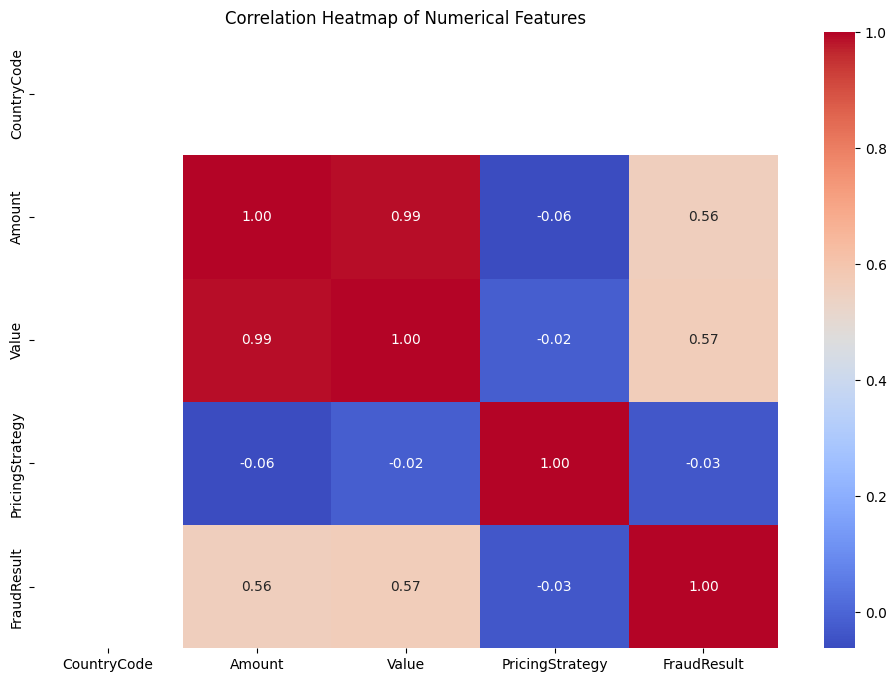

In [25]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Display correlation matrix
print("🔹 Correlation Matrix:")
display(corr_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## ❗ Identifying Missing Values

Before modeling, it is crucial to check for missing values in the dataset:  
- Determine **which columns** have missing data  
- Understand the **extent of missingness**  
- Plan appropriate **imputation strategies** or decide if rows/columns should be removed  

This ensures that the model receives complete and clean data.


In [26]:
# Check for missing values in the dataset
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Combine results into a single DataFrame
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percent
})

# Filter only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]

# Display missing value information
if missing_df.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠ Columns with missing values:")
    display(missing_df)


✅ No missing values found in the dataset.


## Outlier Detection Using Boxplots

Outliers can distort model training and affect predictive performance.  
In this step, we visualize numerical features using **boxplots** to identify potential outliers.  

- **Boxplot components:**  
  - The box represents the **interquartile range (IQR)** (Q1 to Q3)  
  - The line inside the box represents the **median**  
  - Whiskers show data within 1.5 * IQR  
  - Points outside the whiskers are considered **outliers**


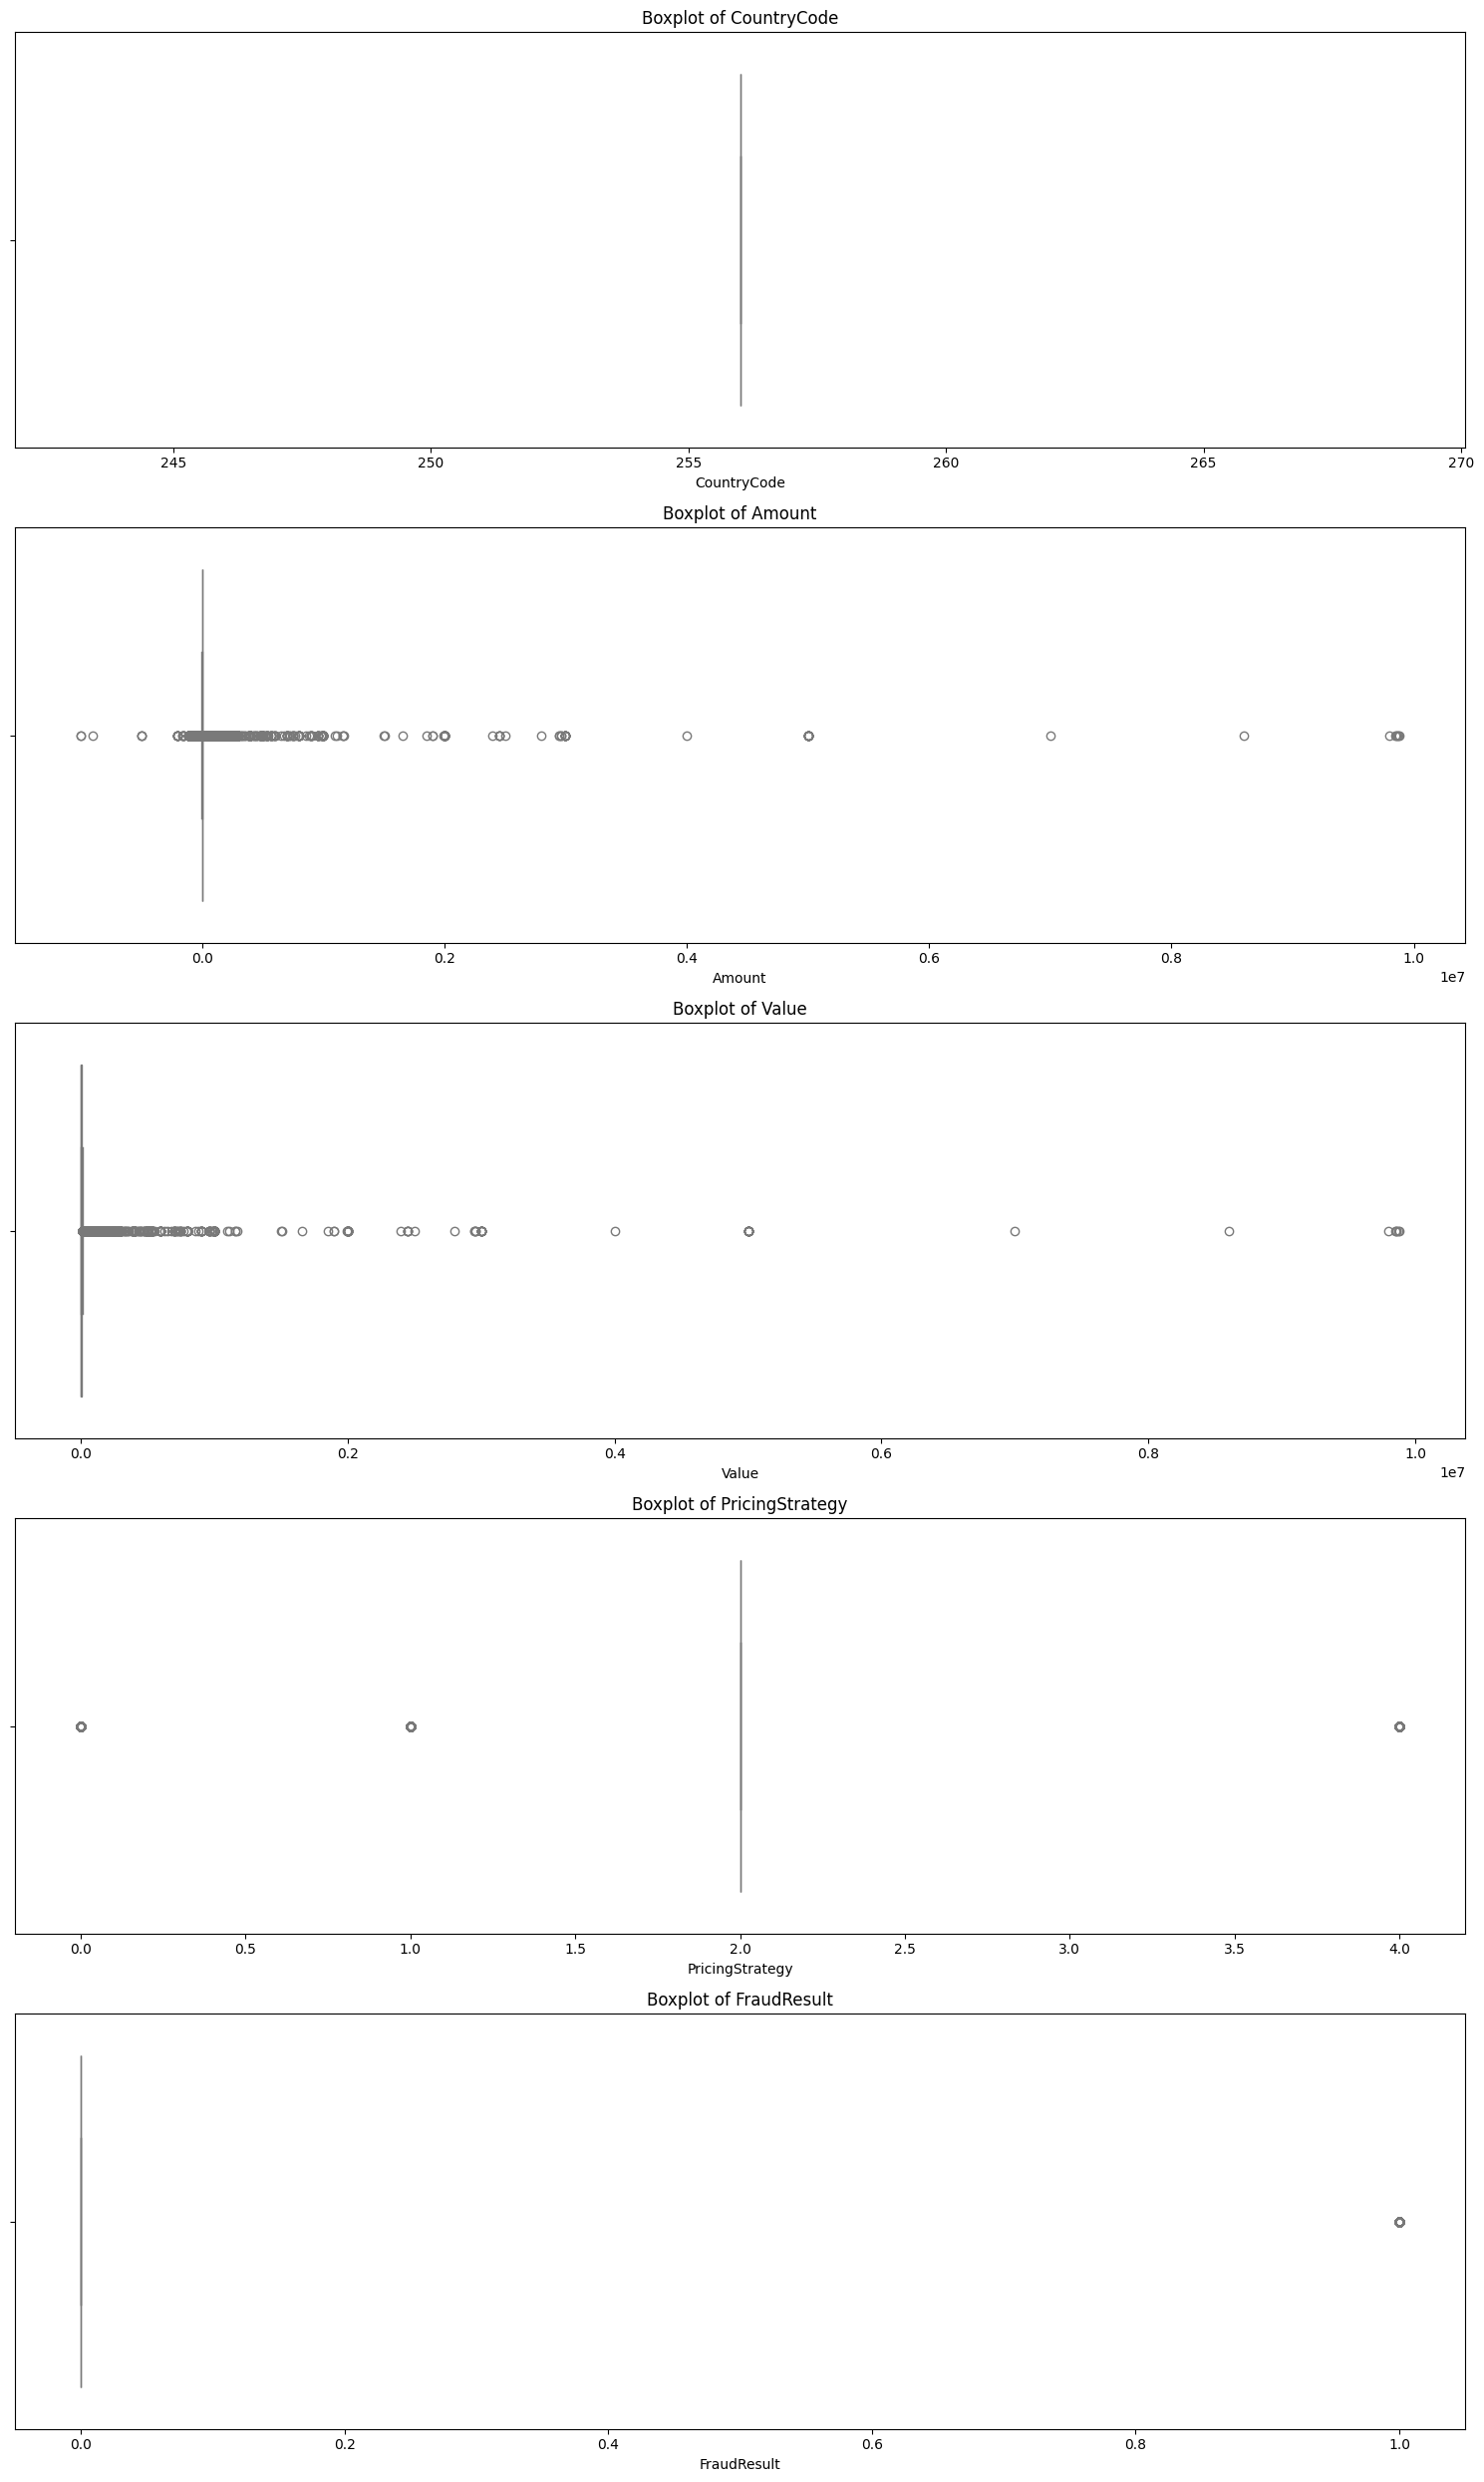


🔹 Number of Outliers per Numerical Feature:
CountryCode: 0
Amount: 24441
Value: 9021
PricingStrategy: 15814
FraudResult: 193


In [27]:
# Set figure size
plt.figure(figsize=(15, 5 * len(numerical_cols)))

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

# Optional: Identify outliers using IQR method
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

print("\n🔹 Number of Outliers per Numerical Feature:")
for col, count in outliers.items():
    print(f"{col}: {count}")


# 🔹 Top Insights from Exploratory Data Analysis (EDA)

1. **Numerical Features:**
   - `Amount` and `Value` are highly skewed (skewness > 50) with extreme outliers (max ~9.88 million).  
   - Standard deviation and range are huge, indicating **high variability** and potential influence of rare, large transactions.  
   - `PricingStrategy` shows moderate skewness (~1.66) with some extreme values (outliers).  
   - `FraudResult` is very sparse (only 193 outliers), as expected for rare fraud events.  

2. **Outliers:**
   - Significant outliers exist in `Amount` (24,441), `Value` (9,021), and `PricingStrategy` (15,814).  
   - `CountryCode` has no outliers; `FraudResult` outliers represent rare but important cases.  
   - These outliers suggest the need for **capping or log transformation** before modeling.  

3. **Correlations:**
   - `Amount` and `Value` are **highly correlated (0.99)**, indicating potential redundancy.  
   - `FraudResult` has moderate correlation with `Amount` (0.56) and `Value` (0.57), suggesting large transactions may be associated with higher fraud risk.  
   - `PricingStrategy` is weakly correlated with other numerical features.  

4. **Categorical Features:**
   - Most transactions are in `CurrencyCode = UGX` and `CountryCode = 256` (single-country dataset).  
   - Dominant product providers: `ProviderId_4` (38%) and `ProviderId_6` (36%).  
   - Top product categories: `financial_services` and `airtime` (~95% combined).  
   - `ChannelId` shows most transactions occur via `ChannelId_3` (web or app), indicating usage concentration.  
   - Rare categories exist in `ProductId` and `PricingStrategy`, which may need **grouping as “Other”**.  

5. **Data Quality:**
   - ✅ No missing values were found.  
   - Dataset contains **95,662 records** and 16 features, suitable for model training.  
   - Numerical features vary greatly in scale and distribution, highlighting the need for **normalization/standardization** during preprocessing.  

**Implications for Modeling:**
- Feature engineering: Aggregate metrics per customer, encode rare categories, handle outliers.  
- Model selection: Consider models robust to skewed data and outliers (e.g., tree-based models).  
- Preprocessing: Normalization/log transformation of `Amount` and `Value`, grouping rare categorical levels.
